### Tutorial 1. Introduction to Synapse Python API
* For detailed hands on instructions using python API please visit [getting started guide](https://www.synapse.org/#!Synapse:syn1768504)
* If you have any questions about python API please feel free to post them on the [python API forum](http://support.sagebase.org/sagebase/products/sagebase_synapse_python_client)

In [51]:
#import the synapse python API
import synapseclient
from synapseclient import Wiki, File, Project, Folder
import pandas as pd
import seaborn as sns
%matplotlib inline  


In [52]:
RESULT_FOLDER = 'syn6134567'
DATA_FILE = 'syn6115761'

### Login to synapse using the API

In [53]:
#login using locally stored credentials
syn = synapseclient.login()
#Need help try
#syn.login?

Welcome, Larsson Omberg!



### Fetch the dataset for Problem 2 and read into data frame

In [54]:
dataFile = syn.get(DATA_FILE)
df = pd.read_csv(dataFile.path)

### Visualize correlation structure between certain variables


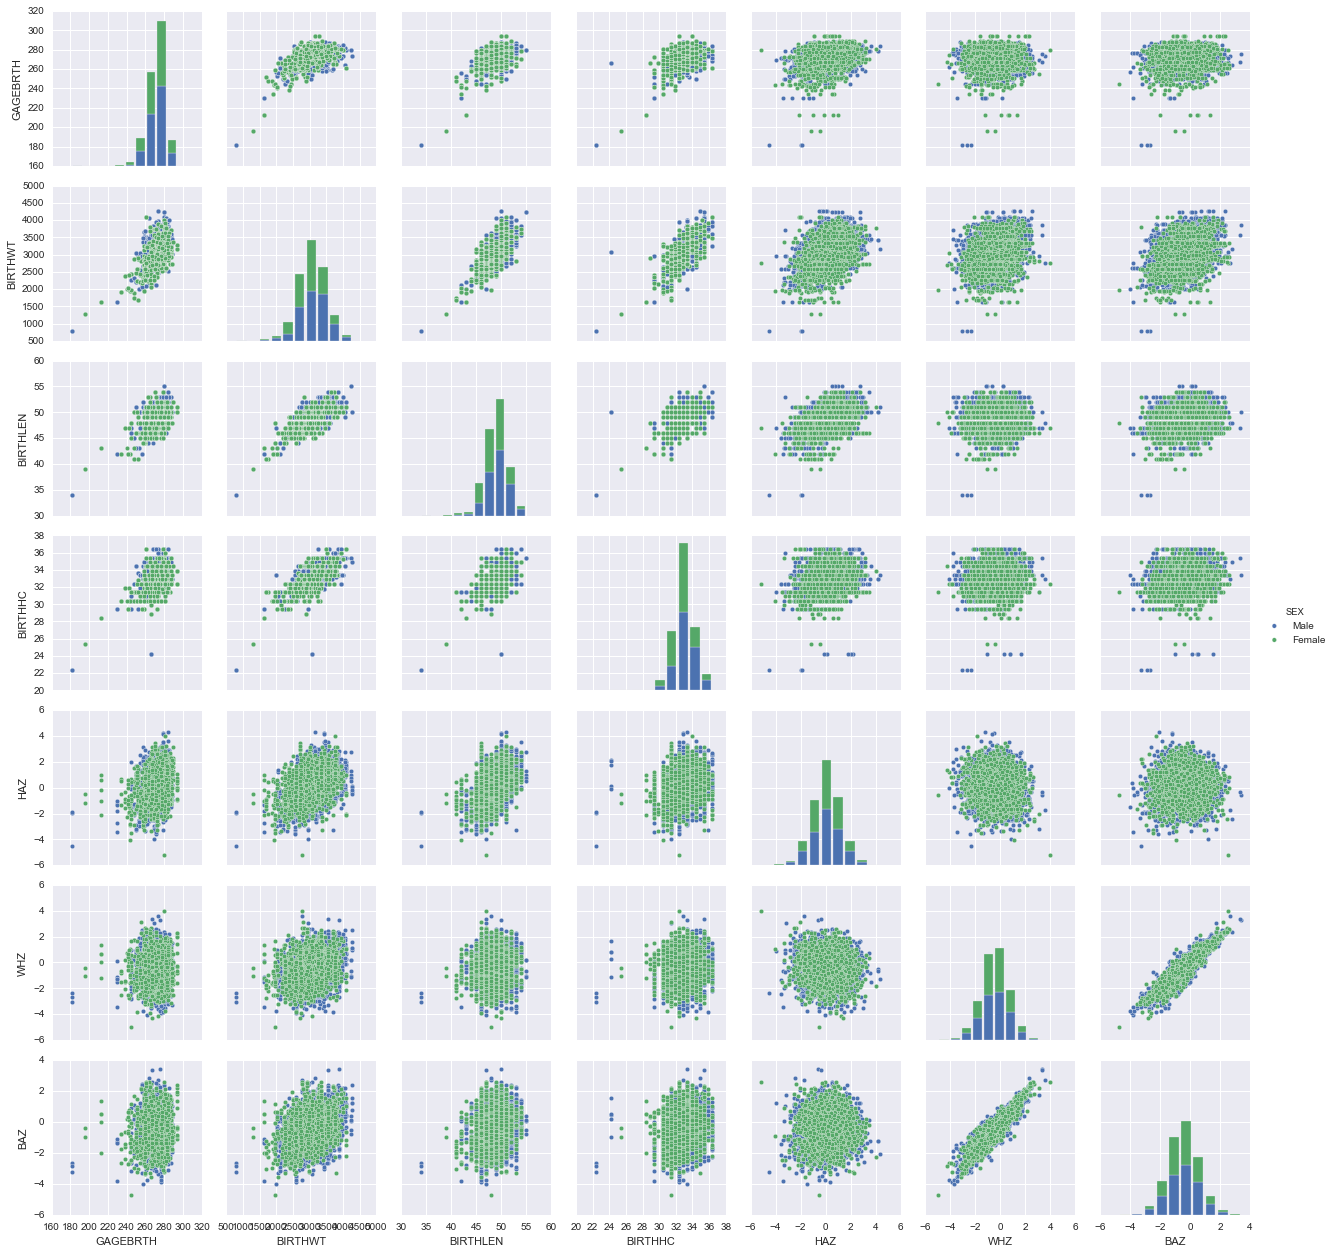

In [55]:
sns_plot =sns.pairplot(df[['SEX', 'GAGEBRTH', 'BIRTHWT','BIRTHLEN', 'BIRTHHC', 'HAZ', 'WHZ', 'BAZ']].dropna(), hue="SEX")
sns_plot.savefig("correlations.png")

### Store figure in Synapse


In [50]:
correlationFile = File('correlations.png', parentId=RESULT_FOLDER)
correlationFile = syn.store(correlationFile, 
                            used=dataFile,
                            executed='https://github.com/Sage-Bionetworks/HBGDki_Hackathon/blob/master/Synapse_Python_API_demo.ipynb')


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     421.8kB/421.8kB correlations.png Done...
    

### See content in Synapse

In [56]:
syn.onweb(correlationFile)